## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap NULL scan (polite)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [3]:
directory = '/home/user/notebooks/pcaps/nmap_null_scan_polite'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [5]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    400.15849
Name: time, dtype: float64

In [6]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [7]:
scan_times
#duration_list

0    400.158490
1    400.168915
2    400.161719
3    400.138144
4    400.147946
5    400.168519
6    400.156984
7    400.162120
8    400.165717
9    400.150967
Name: Scan times, dtype: float64

In [8]:
temp = pd.DataFrame(duration_list)

In [9]:
temp.mean()

0    400.157952
dtype: float64

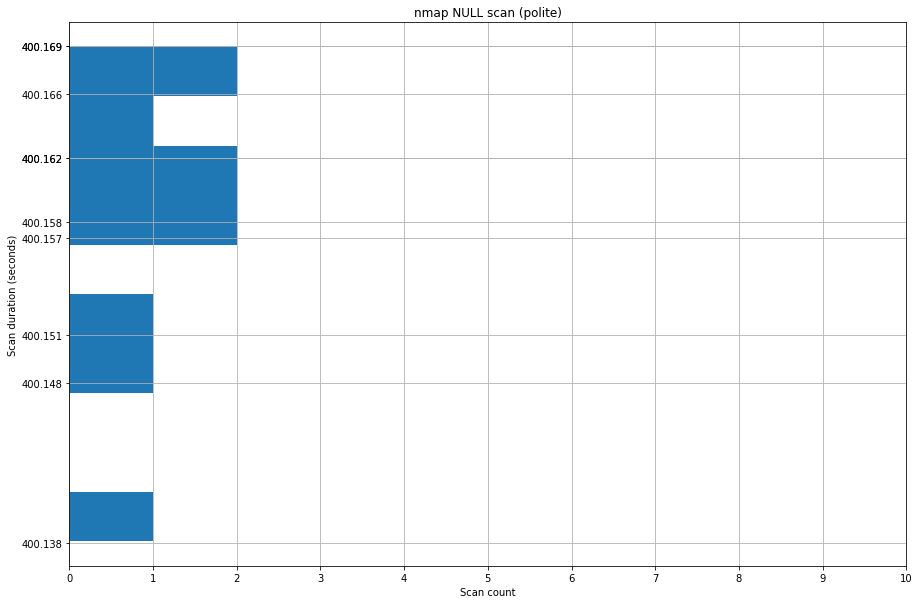

In [10]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [11]:
temp.describe()

,0
count,10.000000
mean,400.157952
std,0.009810
min,400.138144
25%,400.152471
50%,400.160105
75%,400.164818
max,400.168915


## Packet count

In [12]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [13]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [14]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 49.98026377274913



## Order of ports scanned


In [15]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 52597 110
2 52597 1723
3 52597 443
4 52597 80
5 52597 3389
6 52597 993
7 52597 8080
8 52597 143
9 52597 3306
10 52597 53
11 52597 21
12 52597 1720
13 52597 199
14 52597 995
15 52597 25
16 52597 256
17 52597 587
18 52597 5900
19 52597 135
20 52597 445
21 52597 554
22 52597 8888
23 52597 113
24 52597 22
25 52597 1025
26 52597 111
27 52597 139
28 52597 23
29 52597 5120
30 52597 1096
31 52597 8011
32 52597 1301
33 52597 3031
34 52597 5901
35 52597 2557
36 52597 8600
37 52597 49167
38 52597 88
39 52597 1028
40 52597 24
41 52597 7777
42 52597 6006
43 52597 5859
44 52597 1126
45 52597 4550
46 52597 481
47 52597 8994
48 52597 306
49 52597 44442
50 52597 5998
51 52597 5730
52 52597 8093
53 52597 49161
54 52597 12265
55 52597 13783
56 52597 57797
57 52597 2190
58 52597 6123
59 52597 1521
60 52597 3801
61 52597 1503
62 52597 10012
63 52597 4224
64 52597 17988
65 52597 2710
66 52597 41511
67 52597 6566
68 52597 3826
69 52597 5004
70 52597 8021
71 52597 3001
72 52597 15742
73 52597 563
74 52597 5

595 52597 1082
596 52597 1164
597 52597 10243
598 52597 593
599 52597 32770
600 52597 3006
601 52597 3766
602 52597 9575
603 52597 2043
604 52597 44501
605 52597 18988
606 52597 2608
607 52597 4343
608 52597 4003
609 52597 20828
610 52597 668
611 52597 20031
612 52597 3000
613 52597 1052
614 52597 1755
615 52597 1030
616 52597 3517
617 52597 82
618 52597 9080
619 52597 20
620 52597 5952
621 52597 5907
622 52597 2160
623 52597 500
624 52597 3737
625 52597 9003
626 52597 8099
627 52597 49165
628 52597 33
629 52597 8800
630 52597 1022
631 52597 9917
632 52597 7100
633 52597 3551
634 52597 8090
635 52597 1106
636 52597 2005
637 52597 40193
638 52597 2967
639 52597 16012
640 52597 5822
641 52597 9666
642 52597 8649
643 52597 1533
644 52597 1998
645 52597 3905
646 52597 55055
647 52597 9290
648 52597 1010
649 52597 49158
650 52597 3580
651 52597 512
652 52597 1043
653 52597 6000
654 52597 10009
655 52597 6901
656 52597 1033
657 52597 3052
658 52597 783
659 52597 10001
660 52597 8192
661 5259

595 53169 5101
596 53169 30718
597 53169 700
598 53169 722
599 53169 1296
600 53169 49160
601 53169 54045
602 53169 259
603 53169 902
604 53169 60020
605 53169 32770
606 53169 7999
607 53169 9999
608 53169 10629
609 53169 8400
610 53169 1719
611 53169 24
612 53169 19283
613 53169 5500
614 53169 5432
615 53169 2607
616 53169 9502
617 53169 99
618 53169 3323
619 53169 49175
620 53169 7777
621 53169 1147
622 53169 593
623 53169 2105
624 53169 19842
625 53169 1801
626 53169 5221
627 53169 481
628 53169 5718
629 53169 50003
630 53169 79
631 53169 1078
632 53169 3017
633 53169 1310
634 53169 3390
635 53169 8254
636 53169 1500
637 53169 6789
638 53169 2393
639 53169 1112
640 53169 163
641 53169 5963
642 53169 10621
643 53169 5544
644 53169 8500
645 53169 7001
646 53169 49158
647 53169 389
648 53169 5001
649 53169 458
650 53169 6792
651 53169 9040
652 53169 500
653 53169 4242
654 53169 33899
655 53169 6566
656 53169 49163
657 53169 5802
658 53169 3030
659 53169 7106
660 53169 8873
661 53169 11

761 46224 3703
762 46224 3809
763 46224 4001
764 46224 1067
765 46224 5960
766 46224 873
767 46224 16113
768 46224 444
769 46224 801
770 46224 9999
771 46224 6025
772 46224 3390
773 46224 2968
774 46224 2126
775 46224 6567
776 46224 1500
777 46224 1755
778 46224 5440
779 46224 3003
780 46224 280
781 46224 1131
782 46224 9485
783 46224 9010
784 46224 27000
785 46224 5221
786 46224 2046
787 46224 7435
788 46224 26214
789 46224 1044
790 46224 9099
791 46224 45100
792 46224 481
793 46224 700
794 46224 9101
795 46224 5987
796 46224 1072
797 46224 1501
798 46224 5800
799 46224 1213
800 46224 1090
801 46224 6
802 46224 2049
803 46224 1000
804 46224 10621
805 46224 5061
806 46224 1183
807 46224 1272
808 46224 33899
809 46224 19
810 46224 6565
811 46224 5357
812 46224 992
813 46224 2196
814 46224 512
815 46224 898
816 46224 1049
817 46224 57797
818 46224 3017
819 46224 3013
820 46224 16080
821 46224 541
822 46224 5080
823 46224 1091
824 46224 1761
825 46224 10000
826 46224 1071
827 46224 2725
8

927 63456 2048
928 63456 41511
929 63456 1024
930 63456 2009
931 63456 1122
932 63456 1071
933 63456 5101
934 63456 2007
935 63456 6692
936 63456 21571
937 63456 1065
938 63456 5961
939 63456 10082
940 63456 3826
941 63456 1074
942 63456 1082
943 63456 5730
944 63456 783
945 63456 14441
946 63456 903
947 63456 9999
948 63456 1092
949 63456 1043
950 63456 6389
951 63456 3945
952 63456 4004
953 63456 1047
954 63456 7000
955 63456 6001
956 63456 5510
957 63456 84
958 63456 32782
959 63456 3986
960 63456 8089
961 63456 2107
962 63456 1076
963 63456 5811
964 63456 17988
965 63456 2401
966 63456 25735
967 63456 89
968 63456 9968
969 63456 5030
970 63456 27353
971 63456 3851
972 63456 6580
973 63456 49163
974 63456 1641
975 63456 22939
976 63456 5902
977 63456 4005
978 63456 1501
979 63456 1755
980 63456 51493
981 63456 1201
982 63456 1914
983 63456 2366
984 63456 9090
985 63456 5802
986 63456 8011
987 63456 2068
988 63456 1165
989 63456 1271
990 63456 514
991 63456 513
992 63456 8085
993 634

594 41349 9502
595 41349 8087
596 41349 1113
597 41349 1045
598 41349 3546
599 41349 4000
600 41349 1805
601 41349 990
602 41349 999
603 41349 5060
604 41349 1091
605 41349 5800
606 41349 33
607 41349 2910
608 41349 6003
609 41349 9418
610 41349 49160
611 41349 3920
612 41349 8083
613 41349 1056
614 41349 10629
615 41349 5054
616 41349 50000
617 41349 4224
618 41349 4001
619 41349 5102
620 41349 1108
621 41349 4445
622 41349 19283
623 41349 32783
624 41349 9220
625 41349 514
626 41349 2968
627 41349 2046
628 41349 9009
629 41349 5987
630 41349 106
631 41349 15000
632 41349 7106
633 41349 3003
634 41349 1717
635 41349 15002
636 41349 254
637 41349 8181
638 41349 2607
639 41349 700
640 41349 8011
641 41349 14442
642 41349 5802
643 41349 1641
644 41349 10010
645 41349 64623
646 41349 2525
647 41349 8193
648 41349 1141
649 41349 163
650 41349 50001
651 41349 8001
652 41349 9001
653 41349 1086
654 41349 2710
655 41349 9290
656 41349 5959
657 41349 427
658 41349 16000
659 41349 54045
660 413

260 36042 1026
261 36042 700
262 36042 50300
263 36042 1151
264 36042 13783
265 36042 24
266 36042 5915
267 36042 1434
268 36042 2068
269 36042 8194
270 36042 8600
271 36042 264
272 36042 82
273 36042 2875
274 36042 48080
275 36042 9002
276 36042 9011
277 36042 416
278 36042 2869
279 36042 1503
280 36042 726
281 36042 3918
282 36042 1287
283 36042 1104
284 36042 6567
285 36042 4279
286 36042 1099
287 36042 8649
288 36042 5952
289 36042 3995
290 36042 481
291 36042 4111
292 36042 5221
293 36042 7201
294 36042 10003
295 36042 992
296 36042 2013
297 36042 50003
298 36042 9103
299 36042 49167
300 36042 9099
301 36042 1154
302 36042 6668
303 36042 42510
304 36042 5678
305 36042 7443
306 36042 1580
307 36042 1032
308 36042 1060
309 36042 34572
310 36042 49154
311 36042 5060
312 36042 49
313 36042 5815
314 36042 1840
315 36042 31038
316 36042 4002
317 36042 1063
318 36042 14238
319 36042 1050
320 36042 458
321 36042 8082
322 36042 2004
323 36042 3071
324 36042 4
325 36042 5357
326 36042 1111


427 53651 1277
428 53651 481
429 53651 8084
430 53651 9898
431 53651 1947
432 53651 631
433 53651 9080
434 53651 10004
435 53651 6002
436 53651 8088
437 53651 616
438 53651 1107
439 53651 1185
440 53651 1063
441 53651 3517
442 53651 1068
443 53651 5961
444 53651 9968
445 53651 5033
446 53651 19
447 53651 9998
448 53651 8654
449 53651 13456
450 53651 14442
451 53651 60443
452 53651 40193
453 53651 30
454 53651 1035
455 53651 4998
456 53651 30718
457 53651 5555
458 53651 8010
459 53651 5414
460 53651 7103
461 53651 2251
462 53651 45100
463 53651 1066
464 53651 38292
465 53651 1097
466 53651 8087
467 53651 1972
468 53651 9101
469 53651 1096
470 53651 2811
471 53651 465
472 53651 18040
473 53651 1322
474 53651 16000
475 53651 9071
476 53651 49153
477 53651 4321
478 53651 2106
479 53651 8009
480 53651 6502
481 53651 1334
482 53651 2701
483 53651 1104
484 53651 6
485 53651 668
486 53651 9618
487 53651 9
488 53651 8089
489 53651 50001
490 53651 4002
491 53651 6901
492 53651 9876
493 53651 567

93 43627 26214
94 43627 61900
95 43627 1
96 43627 79
97 43627 9110
98 43627 1688
99 43627 7512
100 43627 6792
101 43627 6006
102 43627 8000
103 43627 49154
104 43627 259
105 43627 8093
106 43627 33354
107 43627 1091
108 43627 1054
109 43627 1022
110 43627 1048
111 43627 2035
112 43627 500
113 43627 8084
114 43627 44176
115 43627 55055
116 43627 5051
117 43627 6004
118 43627 416
119 43627 4129
120 43627 62078
121 43627 2010
122 43627 5862
123 43627 668
124 43627 1174
125 43627 8300
126 43627 2048
127 43627 1063
128 43627 15002
129 43627 1500
130 43627 1166
131 43627 981
132 43627 1974
133 43627 9502
134 43627 50002
135 43627 82
136 43627 2049
137 43627 8009
138 43627 5030
139 43627 3690
140 43627 24
141 43627 3128
142 43627 14441
143 43627 2869
144 43627 1024
145 43627 7778
146 43627 1183
147 43627 9998
148 43627 32773
149 43627 8290
150 43627 85
151 43627 6
152 43627 3801
153 43627 515
154 43627 6669
155 43627 10215
156 43627 2005
157 43627 687
158 43627 38292
159 43627 667
160 43627 3

657 43627 20000
658 43627 1108
659 43627 9877
660 43627 1029
661 43627 9485
662 43627 1277
663 43627 1287
664 43627 4242
665 43627 5730
666 43627 888
667 43627 24444
668 43627 1021
669 43627 32784
670 43627 1042
671 43627 2046
672 43627 20828
673 43627 1914
674 43627 1600
675 43627 8652
676 43627 1043
677 43627 3283
678 43627 6009
679 43627 1433
680 43627 2608
681 43627 1999
682 43627 60020
683 43627 4550
684 43627 7435
685 43627 2717
686 43627 1062
687 43627 6007
688 43627 10009
689 43627 1037
690 43627 1259
691 43627 5987
692 43627 800
693 43627 3323
694 43627 1666
695 43627 3000
696 43627 898
697 43627 5280
698 43627 65389
699 43627 2135
700 43627 5910
701 43627 1099
702 43627 8007
703 43627 1092
704 43627 8010
705 43627 1721
706 43627 1900
707 43627 19842
708 43627 1117
709 43627 1151
710 43627 2301
711 43627 17877
712 43627 6059
713 43627 1060
714 43627 1095
715 43627 9878
716 43627 3800
717 43627 2106
718 43627 24800
719 43627 7070
720 43627 3476
721 43627 2701
722 43627 10024
72

260 42872 2099
261 42872 3300
262 42872 2557
263 42872 5087
264 42872 54328
265 42872 543
266 42872 6567
267 42872 9290
268 42872 1124
269 42872 2105
270 42872 7106
271 42872 49152
272 42872 109
273 42872 1121
274 42872 64680
275 42872 1783
276 42872 1081
277 42872 5987
278 42872 5822
279 42872 3517
280 42872 7025
281 42872 9500
282 42872 24800
283 42872 2033
284 42872 4125
285 42872 34573
286 42872 49175
287 42872 999
288 42872 3527
289 42872 617
290 42872 15002
291 42872 1053
292 42872 2121
293 42872 3268
294 42872 8194
295 42872 1046
296 42872 42
297 42872 5925
298 42872 8022
299 42872 6779
300 42872 32785
301 42872 1494
302 42872 912
303 42872 1138
304 42872 32781
305 42872 2718
306 42872 2393
307 42872 1057
308 42872 1074
309 42872 3168
310 42872 3211
311 42872 8193
312 42872 34572
313 42872 1151
314 42872 62078
315 42872 79
316 42872 16113
317 42872 9091
318 42872 57294
319 42872 1088
320 42872 10626
321 42872 5221
322 42872 65000
323 42872 119
324 42872 3580
325 42872 33354
326 

411 60865 55056
412 60865 49
413 60865 427
414 60865 57294
415 60865 1863
416 60865 32778
417 60865 1048
418 60865 144
419 60865 1999
420 60865 9050
421 60865 301
422 60865 8292
423 60865 1105
424 60865 6002
425 60865 1148
426 60865 458
427 60865 19315
428 60865 9200
429 60865 1040
430 60865 464
431 60865 1185
432 60865 35500
433 60865 1097
434 60865 8291
435 60865 2998
436 60865 9998
437 60865 5054
438 60865 2041
439 60865 6969
440 60865 16113
441 60865 10566
442 60865 2100
443 60865 7999
444 60865 5002
445 60865 7920
446 60865 1174
447 60865 2702
448 60865 6007
449 60865 3323
450 60865 9944
451 60865 88
452 60865 2710
453 60865 5679
454 60865 2604
455 60865 8333
456 60865 4002
457 60865 3
458 60865 6001
459 60865 12000
460 60865 28201
461 60865 23502
462 60865 2004
463 60865 3372
464 60865 2068
465 60865 3011
466 60865 8090
467 60865 6502
468 60865 1000
469 60865 500
470 60865 416
471 60865 1248
472 60865 8200
473 60865 17
474 60865 38292
475 60865 4567
476 60865 2196
477 60865 2809


In [16]:
orders_port

,scannr,sport,dport
0,1,52597,110
1,2,52597,1723
2,3,52597,443
3,4,52597,80
4,5,52597,3389
...,...,...,...
9995,996,60865,10778
9996,997,60865,808
9997,998,60865,2605
9998,999,60865,687


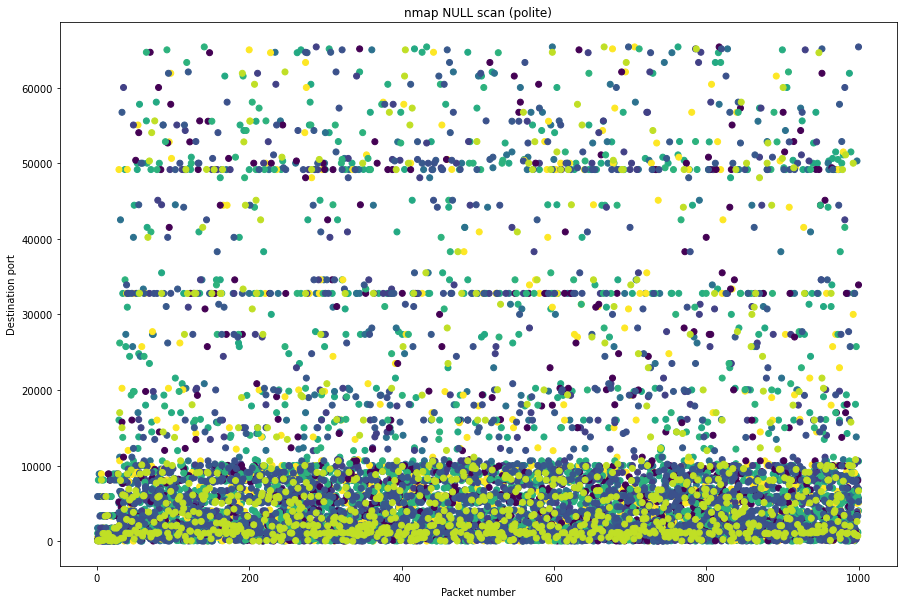

In [17]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [19]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

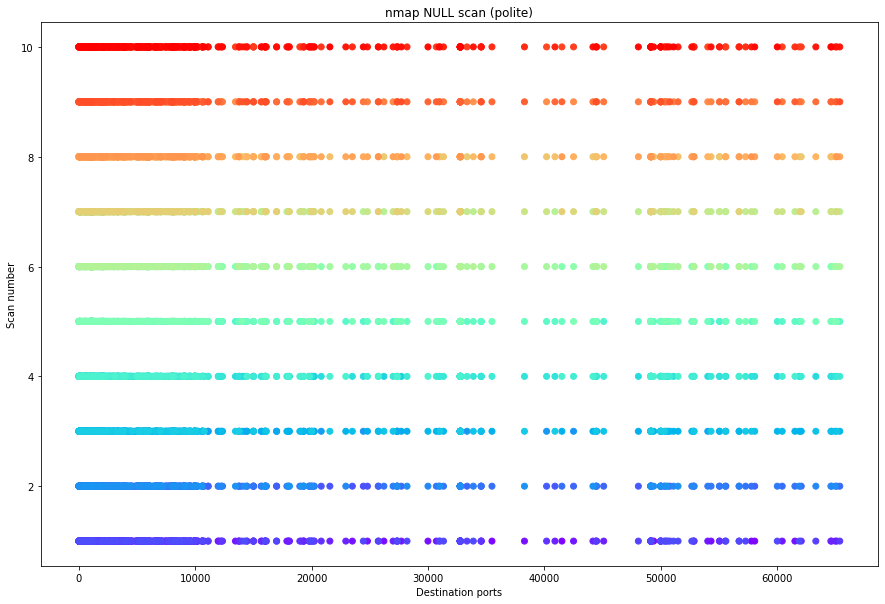

In [20]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

In [41]:
unused_ports = []
used_ports = []
for x in range(1, 65536):
    if x not in tcp_dports:
        unused_ports.append(x)
    elif x in tcp_dports:
        used_ports.append(x)

In [42]:
print(len(unused_ports))

64535


In [43]:
print(len(used_ports))

1000


## Payloads

In [21]:
payloads.value_counts()

0.0    10000
dtype: int64

## IP-ID

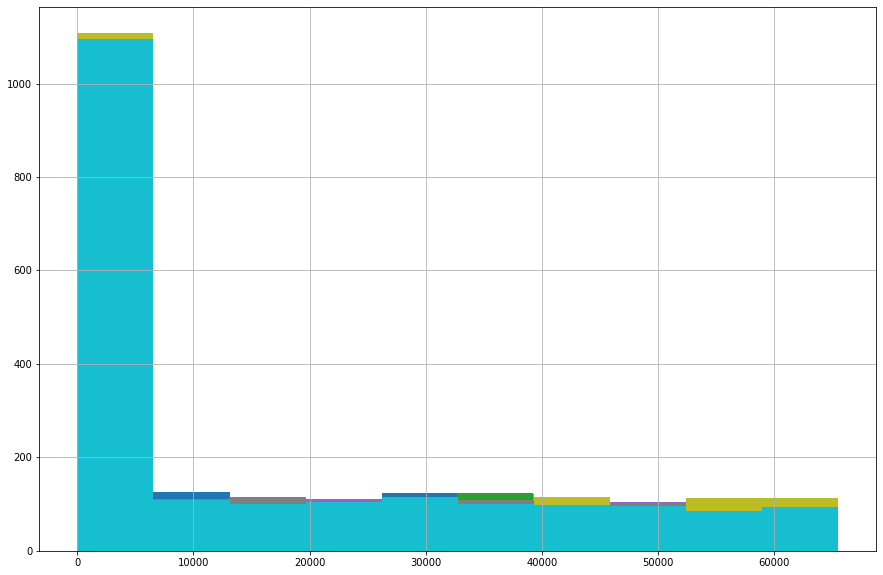

In [25]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

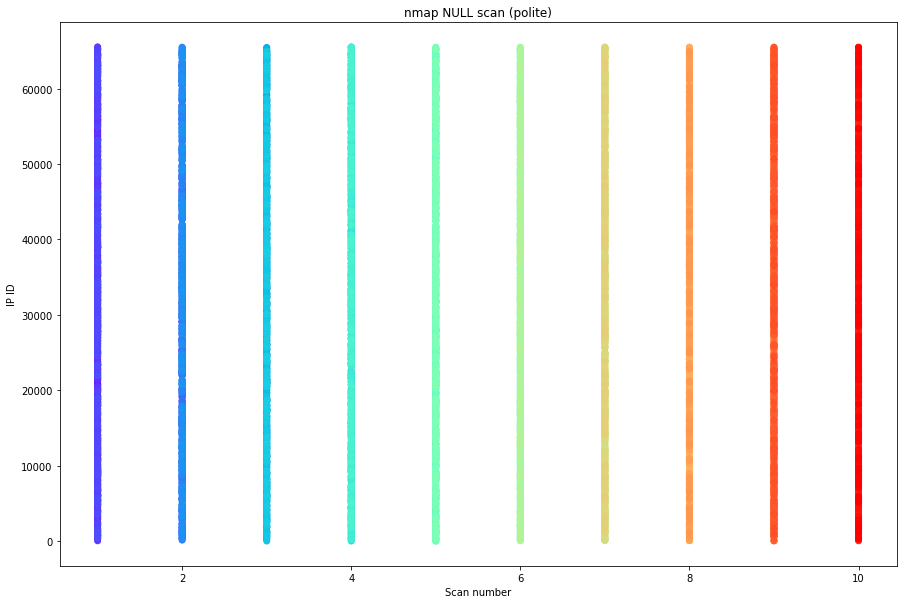

In [26]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


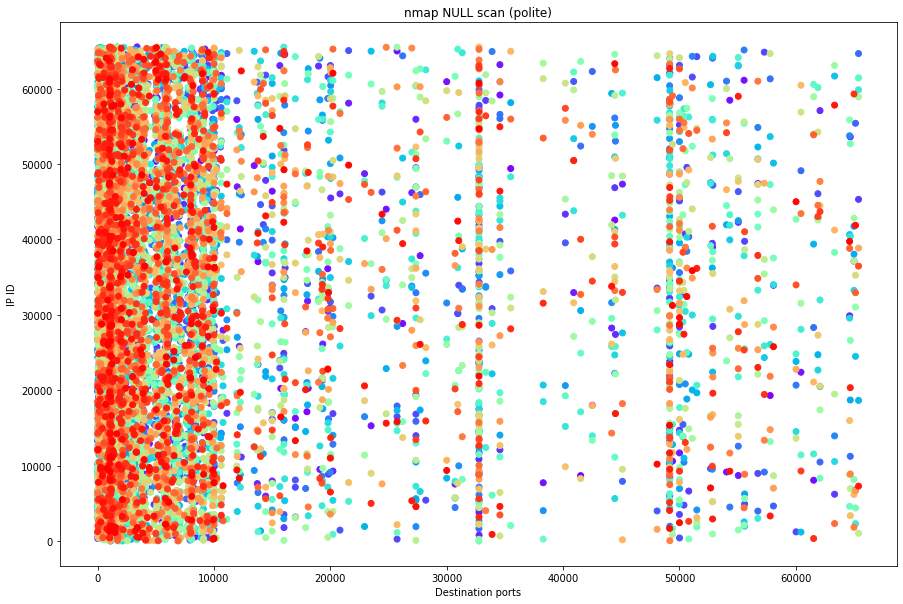

In [27]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids

    colors = cm.rainbow(np.linspace(0, 1, len(ys)))

    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

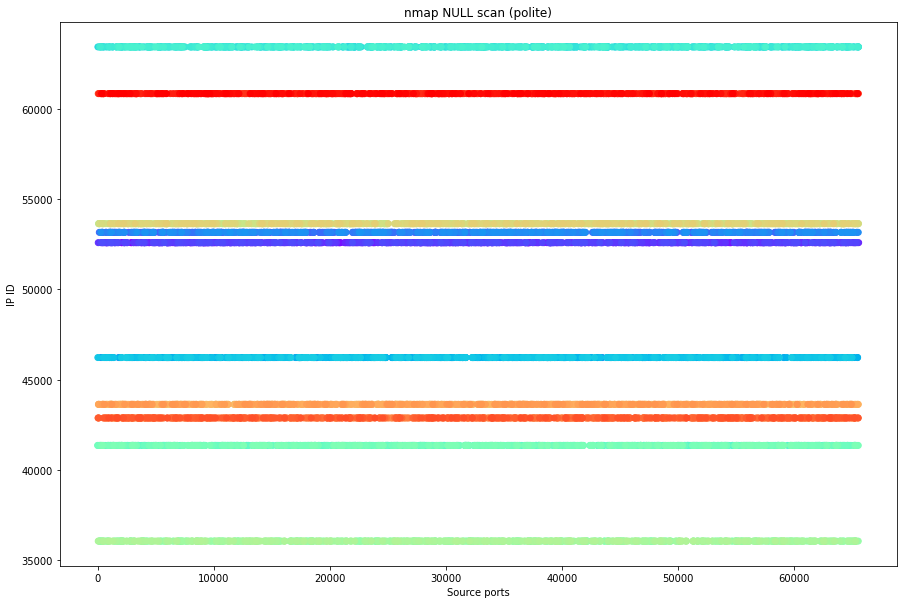

In [28]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids

    plt.rcParams["figure.figsize"] = (15,10)
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Source ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    #plt.scatter(x, ys)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [29]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

## TCP Window size

In [30]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [31]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
S

Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
Sequence number: 337776489
S

Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 200

Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 2006065875
Sequence number: 200

Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
S

Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
Sequence number: 122730355
S

Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
S

Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
Sequence number: 722261048
S

Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 303

Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 3037703418
Sequence number: 303

Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 200

Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 2000569696
Sequence number: 200

Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 377

Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 3778006765
Sequence number: 377

Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 334

Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 3343519103
Sequence number: 334

Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 382

Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 3827783100
Sequence number: 382

Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 267

Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 2673702148
Sequence number: 267

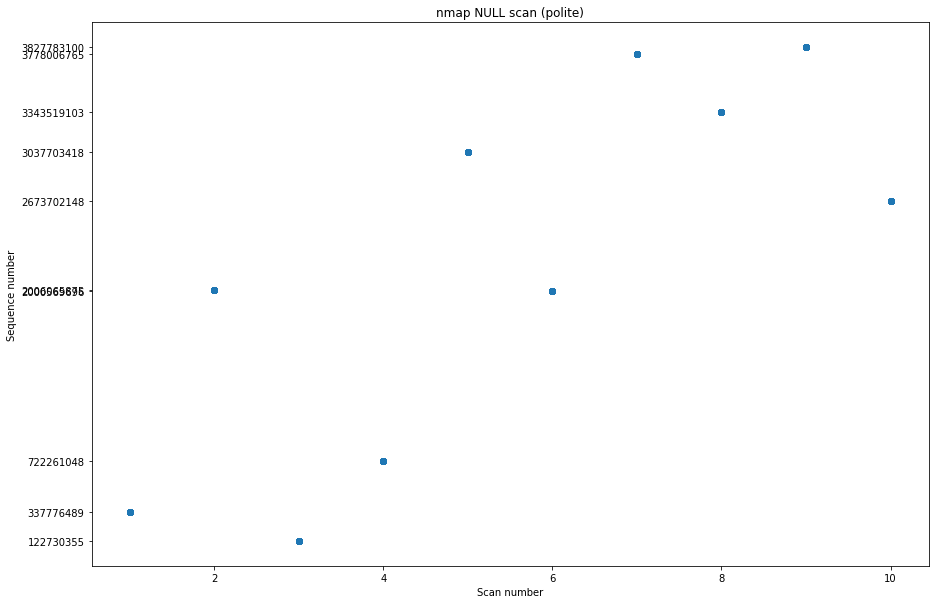

In [32]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()

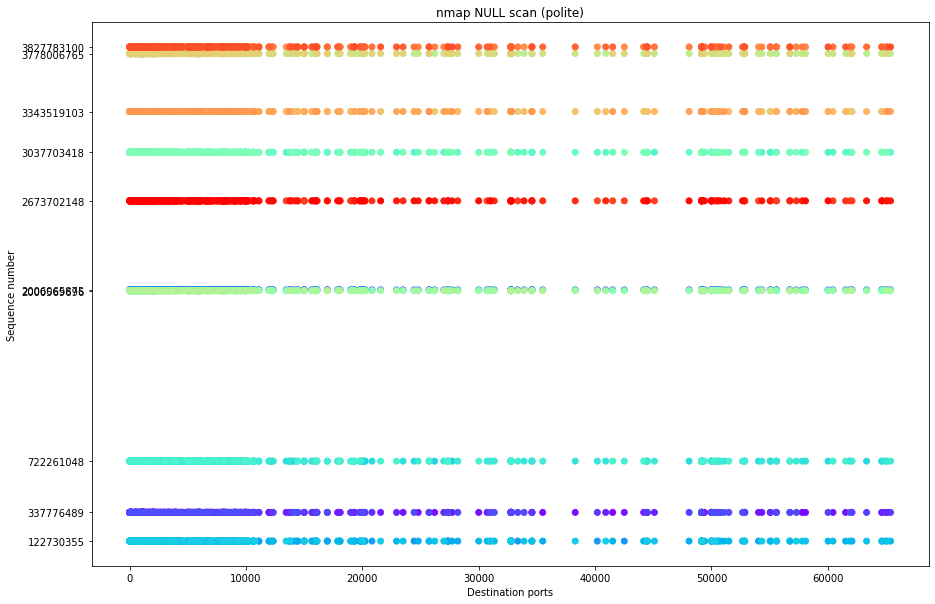

In [33]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

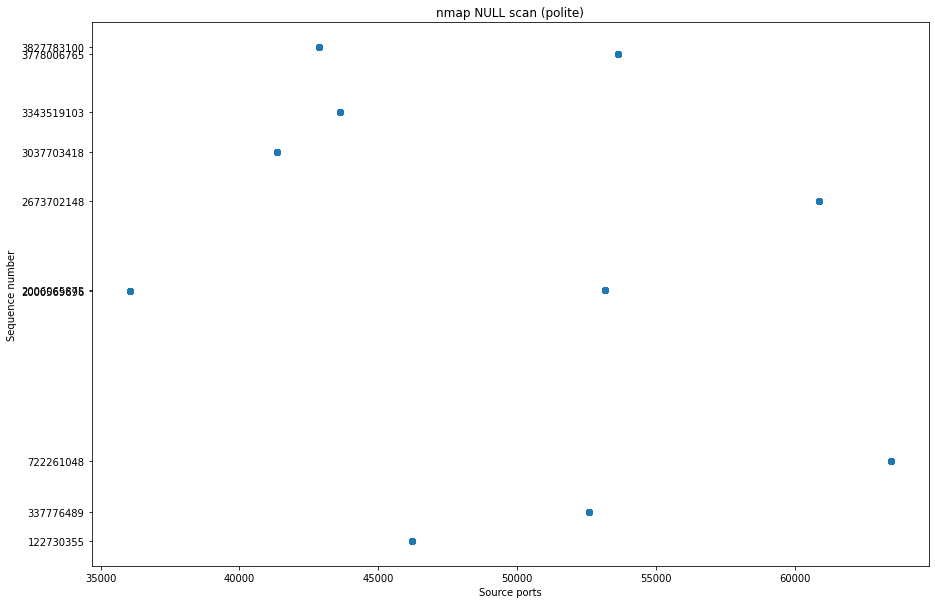

In [34]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()

In [35]:
len(set(orders_port['sport']))

10

## Flags

In [36]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan